In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from amstools import *

In [3]:
from tensorpotential.calculator import grace_fm, TPCalculator

[tensorpotential] Info: Environment variable TF_USE_LEGACY_KERAS is automatically set to '1'.


2026-02-23 18:11:44.240415: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-23 18:11:44.253625: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771866704.267556 2642913 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771866704.271700 2642913 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771866704.282483 2642913 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [4]:
from amstools.thermodynamics import run_convex_hull_calculation, plot_convex_hull

In [5]:
from amstools.sources import fetch_structures, fetch_mp_reference_df

In [6]:
from ase.build import bulk

In [7]:
from pyace.asecalc import PyGRACEFSCalculator

/fscratch/conda/tp2/lib/python3.10/site-packages/pyace/multispecies_basisextension.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [8]:
calc=TPCalculator("seed/1/final_model/")

2026-02-23 18:11:47.612895: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1771866707.613008 2642913 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8007 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:b3:00.0, compute capability: 8.6


In [9]:
cache_dir='../../1-AlLi-GRACE-2LAYER/0-data/AlLi_Materials_Project'

In [10]:
ref_df=fetch_mp_reference_df(['Al','Li'], 
                             # mp_api_key='XXXXX',  ## get from https://next-gen.materialsproject.org/api                         
                             max_atoms=32,
                             cache_dir=cache_dir)

In [11]:
ref_df

,name,ase_atoms,e_per_atom,e_formation_per_atom,e_chull_dist_per_atom
0,Al__mp-1183144,"(Atom('Al', [0.0, 0.0, 0.0], index=0), Atom('A...",NaN,0.010481,0.010481
1,Al__mp-2647008,"(Atom('Al', [0.0, 0.0, 0.0], index=0), Atom('A...",NaN,0.032078,0.032078
2,Al__mp-134,"(Atom('Al', [0.0, 0.0, 0.0], index=0))",NaN,0.000000,0.000000
3,Li__mp-567337,"(Atom('Li', [-0.9218888897176146, 2.8025429460...",NaN,0.008819,0.008819
4,Li__mp-10173,"(Atom('Li', [-1.1807313597921131e-06, 1.740594...",NaN,0.005988,0.005988
5,Li__mp-51,"(Atom('Li', [0.0, 0.0, 0.0], index=0))",NaN,0.001672,0.001672
6,Li__mp-976411,"(Atom('Li', [0.0, 0.0, 1.0216207669999998e-05]...",NaN,0.005889,0.005889
7,Li__mp-1103107,"(Atom('Li', [1.379696372079909, 3.982485883382...",NaN,0.055379,0.055379
8,Li__mp-1063005,"(Atom('Li', [0.0, 0.0, 0.0], index=0), Atom('L...",NaN,0.015671,0.015671
9,Li__mp-1018134,"(Atom('Li', [4.618009551014942, 2.666207852974...",NaN,0.000000,0.000000


In [12]:
struct_dict=fetch_structures(['Al','Li'], 
                             # mp_api_key=MP_API_KEY, 
                             max_atoms=32,
                             cache_dir=cache_dir)

In [13]:
pipeline_dict={}

In [14]:
df, pipeline_dict=run_convex_hull_calculation(structure_dict=struct_dict, calc=calc, pipeline_dict=pipeline_dict)

2026-02-23 18:11:50,771 - root - INFO - Processing structure 'Al__mp-1183144'
2026-02-23 18:11:50,774 - root - INFO - =======================
2026-02-23 18:11:50,775 - root - INFO - Step: optimization
Processing: optimized_structure (4 atom(s)):   0%|                                                                              | 0/1 [00:00<?, ?it/s]WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
I0000 00:00:1771866711.143757 2642913 service.cc:152] XLA service 0x55d6a4e28330 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1771866711.143780 2642913 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2026-02-23 18:11:51.453106: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1771866711.945505 2642913 cuda_dnn.cc:529] Loaded cuDNN version 9

Structure dataset: multiple unique compositions found, trying to construct convex hull


In [15]:
df

,name,ase_atoms,energy,energy_per_atom,equilibrium_volume,equilibrium_bulk_modulus,comp_dict,NUMBER_OF_ATOMS,comp_tuple,n_Al,c_Al,n_Li,c_Li,e_formation_per_atom,e_chull_dist_per_atom
0,Al__mp-1183144,"(Atom('Al', [0.0, 0.0, 0.0], index=0), Atom('A...",-14.946981,-3.736745,66.465971,76.124167,{'Al': 4},4,"((Al, 1.0),)",4,1.000000,0,0.000000,1.662802e-02,1.662802e-02
1,Al__mp-2647008,"(Atom('Al', [0.0, 0.0, 0.0], index=0), Atom('A...",-7.447321,-3.723660,33.451199,80.973855,{'Al': 2},2,"((Al, 1.0),)",2,1.000000,0,0.000000,2.971277e-02,2.971277e-02
2,Al__mp-134,"(Atom('Al', [0.0, 0.0, 0.0], index=0))",-3.753373,-3.753373,16.565613,78.220842,{'Al': 1},1,"((Al, 1.0),)",1,1.000000,0,0.000000,0.000000e+00,0.000000e+00
3,Li__mp-567337,"(Atom('Li', [-0.992217276875674, 2.80932121144...",-15.320747,-1.915093,162.930006,17.105182,{'Li': 8},8,"((Li, 1.0),)",0,0.000000,8,1.000000,1.401421e-07,1.401421e-07
4,Li__mp-10173,"(Atom('Li', [-8.166602675956696e-07, 1.7663761...",-3.826652,-1.913326,40.236662,15.766051,{'Li': 2},2,"((Li, 1.0),)",0,0.000000,2,1.000000,1.767352e-03,1.767352e-03
5,Li__mp-51,"(Atom('Li', [0.0, 0.0, 0.0], index=0))",-1.914108,-1.914108,20.238784,14.774489,{'Li': 1},1,"((Li, 1.0),)",0,0.000000,1,1.000000,9.851034e-04,9.851034e-04
6,Li__mp-976411,"(Atom('Li', [9.219980888835323e-23, -1.0340249...",-7.654198,-1.913550,80.750824,14.691844,{'Li': 4},4,"((Li, 1.0),)",0,0.000000,4,1.000000,1.543982e-03,1.543982e-03
7,Li__mp-1103107,"(Atom('Li', [1.1609298760795022, 4.24166426362...",-22.676984,-1.889749,238.746664,18.140298,{'Li': 12},12,"((Li, 1.0),)",0,0.000000,12,1.000000,2.534484e-02,2.534484e-02
8,Li__mp-1063005,"(Atom('Li', [0.0, 0.0, 0.0], index=0), Atom('L...",-5.710942,-1.903647,61.141399,16.812541,{'Li': 3},3,"((Li, 1.0),)",0,0.000000,3,1.000000,1.144609e-02,1.144609e-02
9,Li__mp-1018134,"(Atom('Li', [4.592433014478235, 2.651442569548...",-5.739971,-1.913324,60.185847,15.093767,{'Li': 3},3,"((Li, 1.0),)",0,0.000000,3,1.000000,1.769850e-03,1.769850e-03


In [16]:
calc_ft=TPCalculator("../3a-finetuning/seed/1/final_model/")

In [17]:
pipeline_dict_ft = {}

In [18]:
df_ft, pipeline_dict_fm=run_convex_hull_calculation(structure_dict=struct_dict, calc=calc_ft, pipeline_dict=pipeline_dict_ft)

2026-02-23 18:12:50,104 - root - INFO - Processing structure 'Al__mp-1183144'
2026-02-23 18:12:50,106 - root - INFO - =======================
2026-02-23 18:12:50,107 - root - INFO - Step: optimization
Processing: optimized_structure (4 atom(s)): 100%|██████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.29s/it]
2026-02-23 18:12:56,403 - root - INFO - Step status: finished
2026-02-23 18:12:56,403 - root - INFO - =======================
2026-02-23 18:12:56,404 - root - INFO - =======================
2026-02-23 18:12:56,404 - root - INFO - Step: murnaghan
Processing: strain_1_1 (4 atom(s)): 100%|█████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 66.69it/s]
2026-02-23 18:12:56,578 - root - INFO - Job is done
2026-02-23 18:12:56,579 - root - INFO - Step status: finished
2026-02-23 18:12:56,580 - root - INFO - =======================
2026-02-23 18:12:56,580 - root - INFO - Processing structure 'Al__mp-2647

Structure dataset: multiple unique compositions found, trying to construct convex hull


{('Al',
  'Li'): <Axes: title={'center': 'Convex Hull: Al-Li'}, xlabel='Concentration of Li', ylabel='Formation energy (eV/atom)'>}

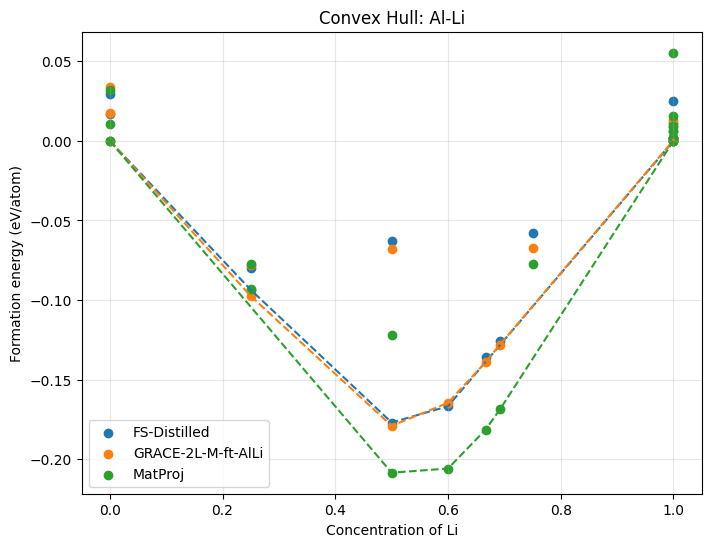

In [19]:
plot_convex_hull({
    "FS-Distilled":df,
    "GRACE-2L-M-ft-AlLi":df_ft, 
    "MatProj":ref_df
})